## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
#
# Your code to import matplotlib, pandas and numpy libraries
#
import pandas as pd
import numpy as np


Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#
# Your code to print shapes of training and test data. Check how the data looks
#

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Your code to print the shape of one image.

x_train[0].shape

(32, 32, 3)

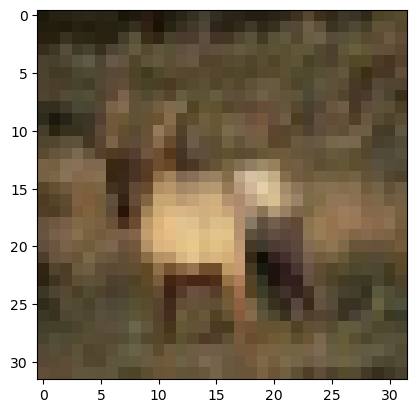

In [5]:
# Your code to show any sample image in the dataset. Use - plt.imshow()

import matplotlib.pyplot as plt

plt.imshow(x_train[3]);

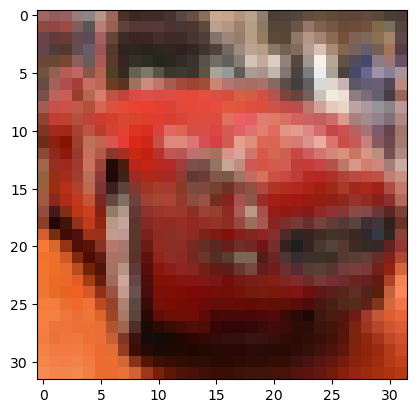

In [6]:
# Show any other image

plt.imshow(x_train[5]);

# PreProcessing

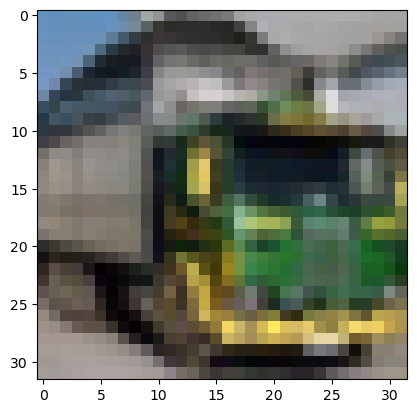

In [7]:
# Your code to print one image in digitals. Check how pixels look like. 

plt.imshow(x_train[14])
plt.show()

In [8]:
# Your code to print shape of any image i.e particular value in the x_train
x_train[9].shape

(32, 32, 3)

In [9]:
# Your code to print the maximum value in x_train. Hint - Use .max()

x_train.max()

255

In [10]:
x_train = x_train/225
x_test = x_test/255

In [11]:
# Print the shape of x_train again.

x_train.shape

(50000, 32, 32, 3)

In [12]:
# Print the shape of y_train again.

y_train.shape

(50000, 1)

# One hot vector encoding.
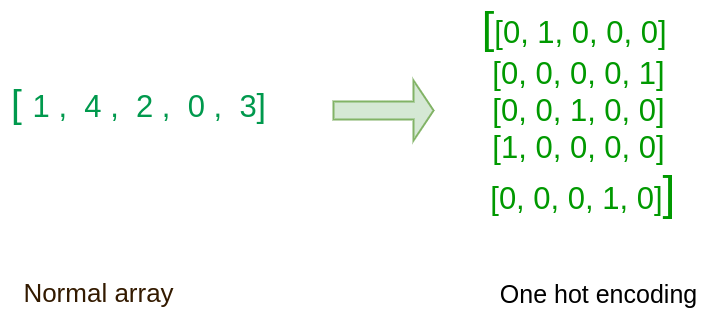


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [13]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]

print(y_train.shape)

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train

print(y_train[0].shape)

(50000, 1)
(1,)


In [14]:
# Your code to print shape of the array y_cat_train

y_cat_train = to_categorical(y_train,10)

In [15]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

print(y_cat_train[0])

# Compare the result for better understanding of "to_categorical()"

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[6]


In [16]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test

y_cat_test = to_categorical(y_test,10)

# Print the shapes to look how y_cat_test looks.

print(y_cat_test.shape)

print(y_test[0])
print(y_cat_test[0])


(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


----------
# Building the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [18]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
#

model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

#
# Add few dense layers. 
#

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [22]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch

history = model.fit( x_train, y_cat_train,
                # the number of times of training using the whole dataset
                    epochs=15,
                    
                    validation_data =(x_test,y_cat_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1,
                    
                # early stopping    
                    callbacks=[early_stop] )

Epoch 1/15
1563/1563 [==============================] - 147s 93ms/step - loss: 1.4979 - accuracy: 0.4630 - val_loss: 1.2836 - val_accuracy: 0.5434
Epoch 2/15
1563/1563 [==============================] - 141s 90ms/step - loss: 1.1099 - accuracy: 0.6124 - val_loss: 1.0921 - val_accuracy: 0.6238
Epoch 3/15
1563/1563 [==============================] - 142s 91ms/step - loss: 0.9436 - accuracy: 0.6730 - val_loss: 1.0683 - val_accuracy: 0.6304
Epoch 4/15
1563/1563 [==============================] - 147s 94ms/step - loss: 0.8205 - accuracy: 0.7166 - val_loss: 0.9057 - val_accuracy: 0.6903
Epoch 5/15
1563/1563 [==============================] - 107s 69ms/step - loss: 0.7284 - accuracy: 0.7494 - val_loss: 0.9975 - val_accuracy: 0.6742
Epoch 6/15
1563/1563 [==============================] - 103s 66ms/step - loss: 0.6520 - accuracy: 0.7761 - val_loss: 0.9423 - val_accuracy: 0.6886
Epoch 7/15
1563/1563 [==============================] - 142s 91ms/step - loss: 0.5868 - accuracy: 0.7997 - val_loss: 1

### We can save the model in a file. Following code shows how to do this.

In [23]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
# Print first few rows of losses.
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.497912,0.46304,1.283602,0.5434
1,1.109877,0.61240,1.092059,0.6238
2,0.943599,0.67304,1.068310,0.6304
3,0.820460,0.71660,0.905734,0.6903
4,0.728414,0.74944,0.997486,0.6742


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





<Axes: >

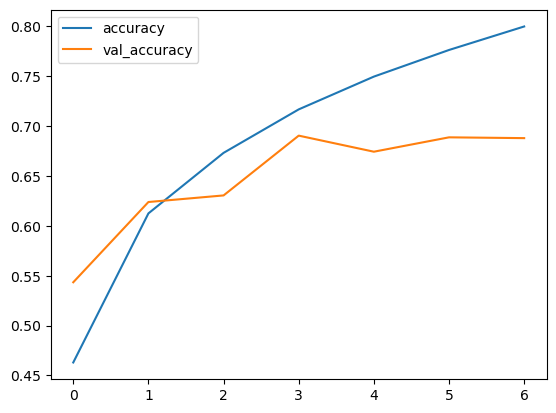

In [26]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
#

losses[['accuracy','val_accuracy']].plot()

<Axes: >

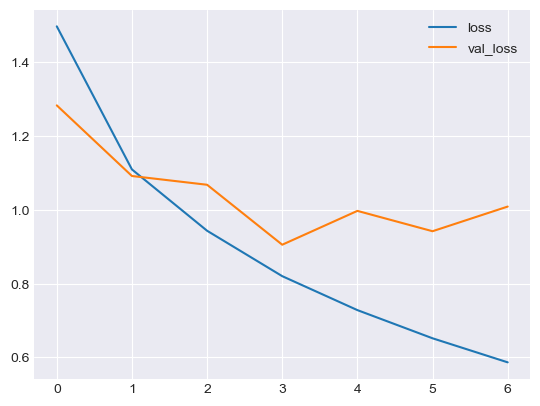

In [28]:
# 
# Your code to plot loss and val_loss vs the epochs
#

losses[['loss','val_loss']].plot()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [29]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [30]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0091807842254639, 0.6877999901771545]

### Make a prediction on test data set.   

In [31]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 7s 22ms/step


### We could get the full classification report. 

In [33]:
# Your code to import classification_report library from sklearn.metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.69      0.90      0.78      1000
           2       0.58      0.57      0.58      1000
           3       0.46      0.62      0.53      1000
           4       0.67      0.64      0.66      1000
           5       0.67      0.52      0.58      1000
           6       0.70      0.83      0.76      1000
           7       0.87      0.64      0.74      1000
           8       0.86      0.69      0.76      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [34]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.71      0.73      0.72      1000\n           1       0.69      0.90      0.78      1000\n           2       0.58      0.57      0.58      1000\n           3       0.46      0.62      0.53      1000\n           4       0.67      0.64      0.66      1000\n           5       0.67      0.52      0.58      1000\n           6       0.70      0.83      0.76      1000\n           7       0.87      0.64      0.74      1000\n           8       0.86      0.69      0.76      1000\n           9       0.82      0.73      0.77      1000\n\n    accuracy                           0.69     10000\n   macro avg       0.70      0.69      0.69     10000\nweighted avg       0.70      0.69      0.69     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [36]:
# Your code to import confusion_matrix library from sklearn.metrics

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[729,  55,  63,  27,  17,   4,  18,   3,  46,  38],
       [ 11, 901,   9,  12,   4,   2,  12,   1,   9,  39],
       [ 70,  15, 569, 102,  71,  53,  84,  12,  13,  11],
       [ 17,  22,  69, 621,  54,  83,  88,  16,  15,  15],
       [ 24,   9,  88,  97, 644,  25,  80,  27,   4,   2],
       [ 15,  15,  62, 255,  52, 516,  43,  25,  10,   7],
       [  7,  12,  39,  62,  20,  16, 835,   2,   3,   4],
       [ 21,  16,  51, 102,  80,  56,  12, 640,   5,  17],
       [106,  92,  18,  30,  13,   5,  11,   7, 691,  27],
       [ 28, 160,  10,  30,   3,   8,  12,   6,  11, 732]])

In [37]:
confusion_matrix(y_test,predictions)

array([[729,  55,  63,  27,  17,   4,  18,   3,  46,  38],
       [ 11, 901,   9,  12,   4,   2,  12,   1,   9,  39],
       [ 70,  15, 569, 102,  71,  53,  84,  12,  13,  11],
       [ 17,  22,  69, 621,  54,  83,  88,  16,  15,  15],
       [ 24,   9,  88,  97, 644,  25,  80,  27,   4,   2],
       [ 15,  15,  62, 255,  52, 516,  43,  25,  10,   7],
       [  7,  12,  39,  62,  20,  16, 835,   2,   3,   4],
       [ 21,  16,  51, 102,  80,  56,  12, 640,   5,  17],
       [106,  92,  18,  30,  13,   5,  11,   7, 691,  27],
       [ 28, 160,  10,  30,   3,   8,  12,   6,  11, 732]])

<Axes: >

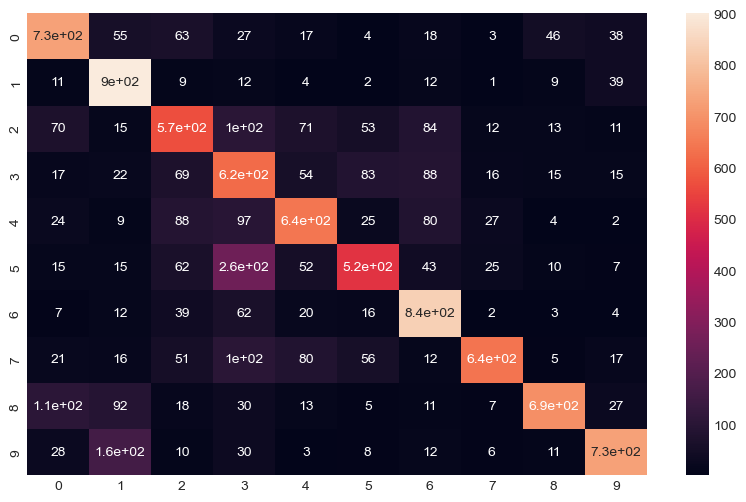

In [38]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [39]:
my_image = x_test[16]

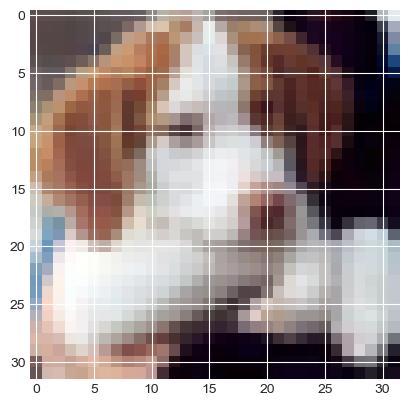

In [40]:
plt.imshow(my_image)

In [41]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 38ms/step


array([[1.1032811e-06, 2.6328836e-04, 2.6279129e-03, 6.5642996e-03,
        2.9073185e-06, 9.9019706e-01, 5.5895463e-05, 5.9914433e-05,
        1.5374765e-06, 2.2620983e-04]], dtype=float32)

In [1]:
# Find the highest probability value in the vector above. 
# What output value does it point to?

In [42]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 54ms/step


array([5])

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 40ms/step


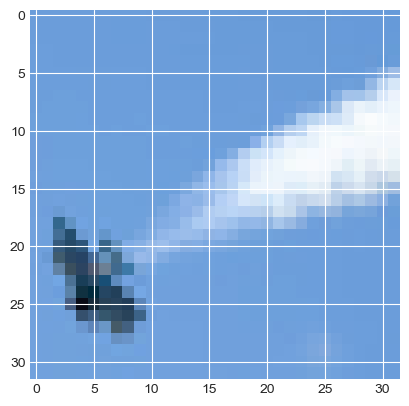

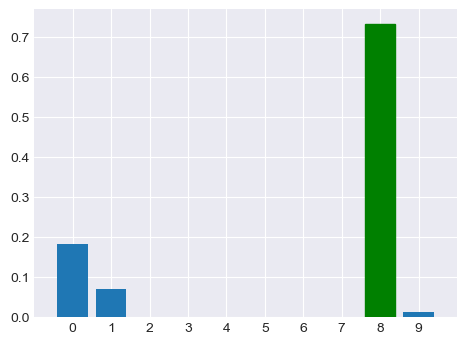

The predicted answer: ship 
 Correct answer: aircraft
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [44]:
from tensorflow.keras.preprocessing.image import array_to_img
import random


# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [45]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta']

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

scores = []
for row in optimizers:
  model.compile(loss='categorical_crossentropy', optimizer= row, metrics=['accuracy'])
  model.fit(x_train,y_cat_train,epochs=3,validation_data=(x_test,y_cat_test),callbacks=[early_stop])
  scores.append(model.evaluate(x_test,y_cat_test,verbose=0))

# Plot score vs optimiser 

Epoch 1/3
1563/1563 [==============================] - 142s 90ms/step - loss: 0.4737 - accuracy: 0.8396 - val_loss: 1.0704 - val_accuracy: 0.7002
Epoch 2/3
1563/1563 [==============================] - 148s 95ms/step - loss: 0.3636 - accuracy: 0.8780 - val_loss: 1.1052 - val_accuracy: 0.6921
Epoch 3/3
1563/1563 [==============================] - 155s 99ms/step - loss: 0.3320 - accuracy: 0.8880 - val_loss: 1.2797 - val_accuracy: 0.6526
Epoch 1/3
1563/1563 [==============================] - 155s 96ms/step - loss: 0.5018 - accuracy: 0.8335 - val_loss: 1.1266 - val_accuracy: 0.6838
Epoch 2/3
1563/1563 [==============================] - 144s 92ms/step - loss: 0.4563 - accuracy: 0.8484 - val_loss: 1.2635 - val_accuracy: 0.7010
Epoch 3/3
1563/1563 [==============================] - 105s 67ms/step - loss: 0.4167 - accuracy: 0.8621 - val_loss: 1.2951 - val_accuracy: 0.6914
Epoch 1/3
1563/1563 [==============================] - 156s 98ms/step - loss: 0.3644 - accuracy: 0.8777 - val_loss: 1.1780 -

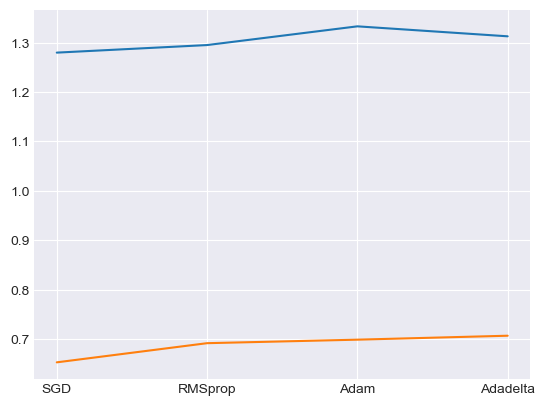

In [46]:
plt.plot (optimizers, scores);

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 